# 7.Lab: SVM



## 1. Objectives
1.   Understand how SVMs work for both linearly and non-linearly separable data.
2.   Visualize the decision boundaries of SVMs with different kernels.
3. Learn to tune soft SVM hyperparameters like C and gamma.
4. Perform model evaluation with various performance metrics.





# Linear SVM

Write code to generate a synthetic 2D dataset of two linearly separable classes using make_classification or make_blobs from sklearn.datasets. Visualise the data on a plot.

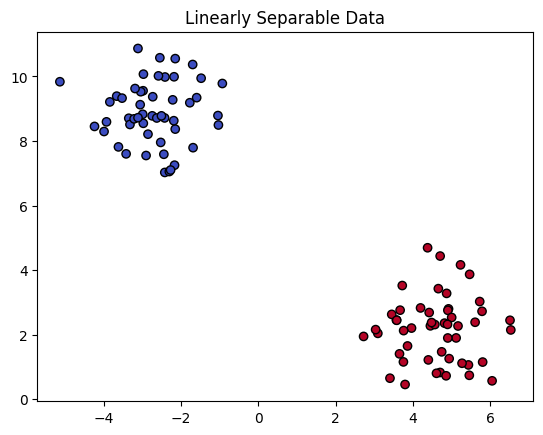

In [3]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate linearly separable data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Linearly Separable Data')
plt.show()


Train an SVM classifier using scikit-learn’s SVC with a linear kernel.
Fit the model on the generated data.

Write a function that takes an SVM and plots its decision boundary and support vectors. Use it to plot your linear SVM.

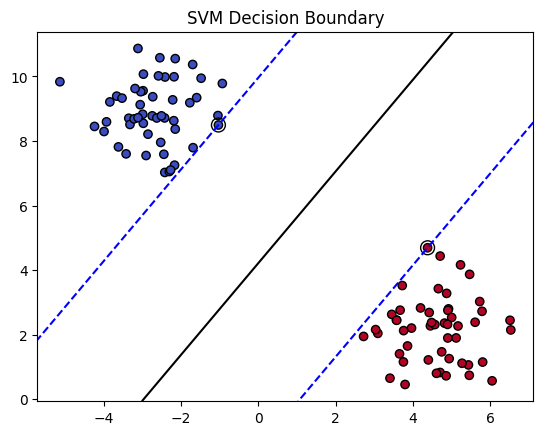

In [4]:
from sklearn.svm import SVC
import numpy as np

# Train SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X,y)

# Make a function to plot decision boundary and support vectors
def plot_svm_decision_boundary(svm, X, y):
      
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Get the separating hyperplane
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'blue'], linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('SVM Decision Boundary')
    plt.show()

#Plot decision boundary of the trained SVM

plot_svm_decision_boundary(svm_linear, X, y)




# Non linear SVM

Create a non-linearly separable dataset using make_moons or make_circles. Visualise the data.

In [5]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X, y =

# Visualize the data


SyntaxError: invalid syntax (621952089.py, line 5)

Using scikit's SVC, train SVMs on this data using a linear kernel, a polynomial kernel and an RBF (Radial Basis Function) kernel.

Using the function you define previously, plot each SVMs boundary and support vectors.

**Compare the decision boundaries of all methods. What do you observe?
Why does the linear kernel fail for non-linearly separable data?
What kind of patterns can the polynomial kernel capture?
Why is the RBF kernel typically better for non-linear data?**

In [ ]:
# Train SVM with a linear kernel
svm_linear=
# Train SVM with a polynomial kernel
svm_poly=

# Train SVM with an RBF kernel
svm_rbf=

# Plot decision boundaries
print("Linear Kernel:")
plot_svm_decision_boundary(svm_linear, X, y)

print("Polynomial Kernel:")
plot_svm_decision_boundary(svm_poly, X, y)

print("RBF Kernel:")
plot_svm_decision_boundary(svm_rbf, X, y)


# Hyperparameter Tuning and Model Evaluation

Use GridSearchCV from sklearn.model_selection to tune the hyperparameters C and gamma on the RBF kernel.

**What is the best model based on GridSearchCV? Why is that?** Plot it.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RBF kernel
param_grid =  {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Set up grid search
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=3)
grid.fit(X, y)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid.best_params_}")

# Plot decision boundary for the best model
plot_svm_decision_boundary(grid.best_estimator_, X, y)
